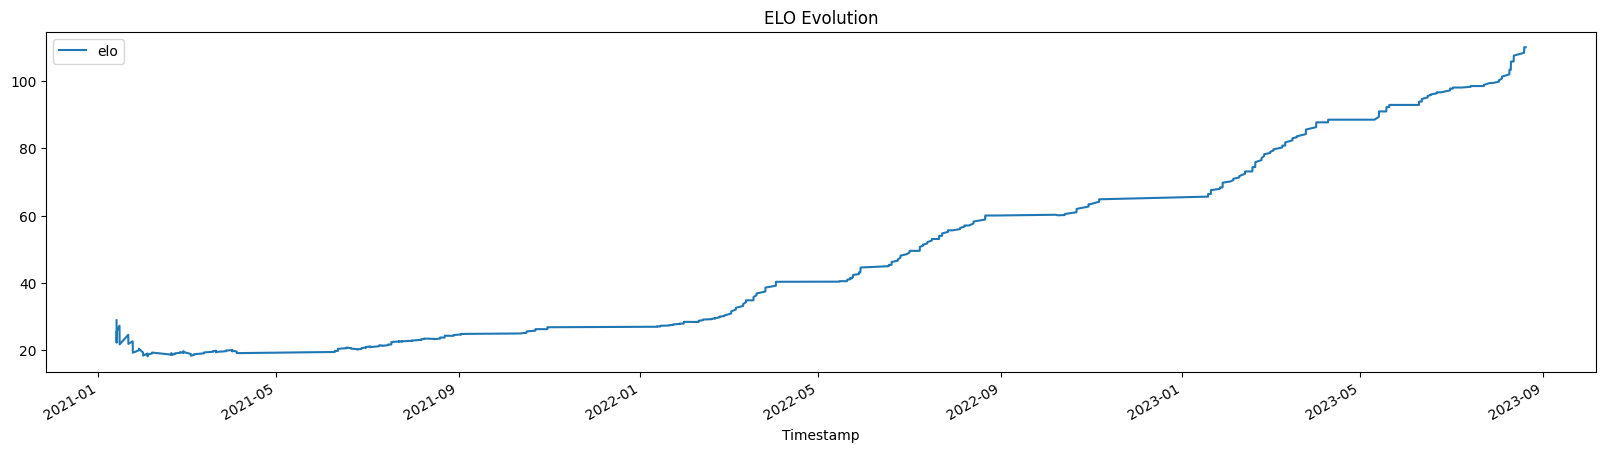

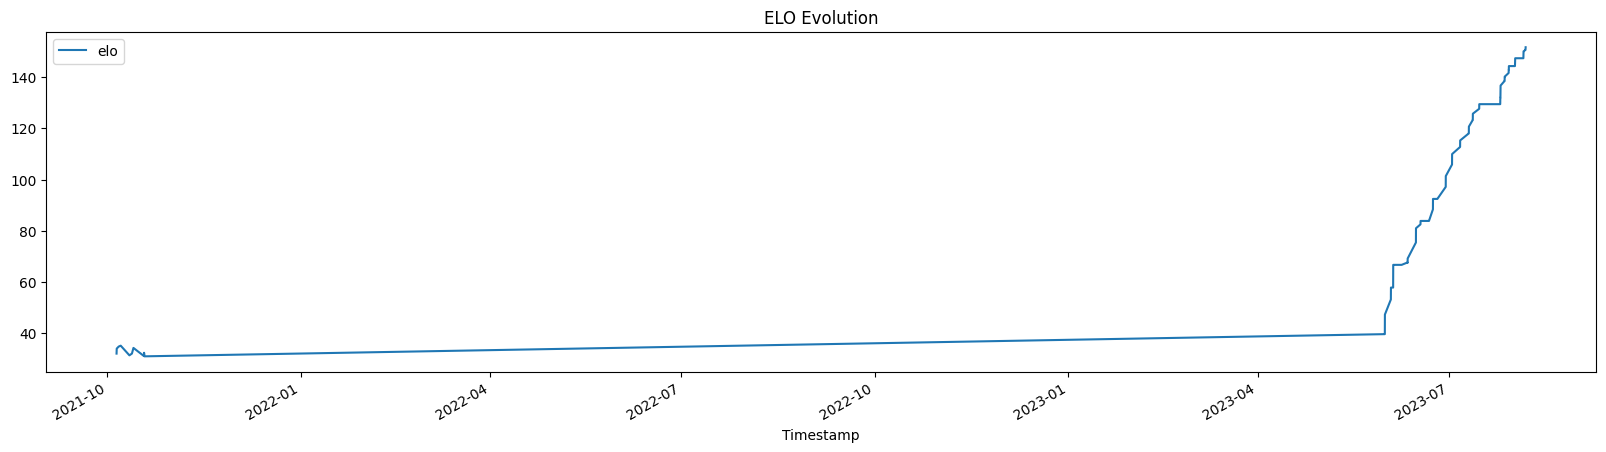

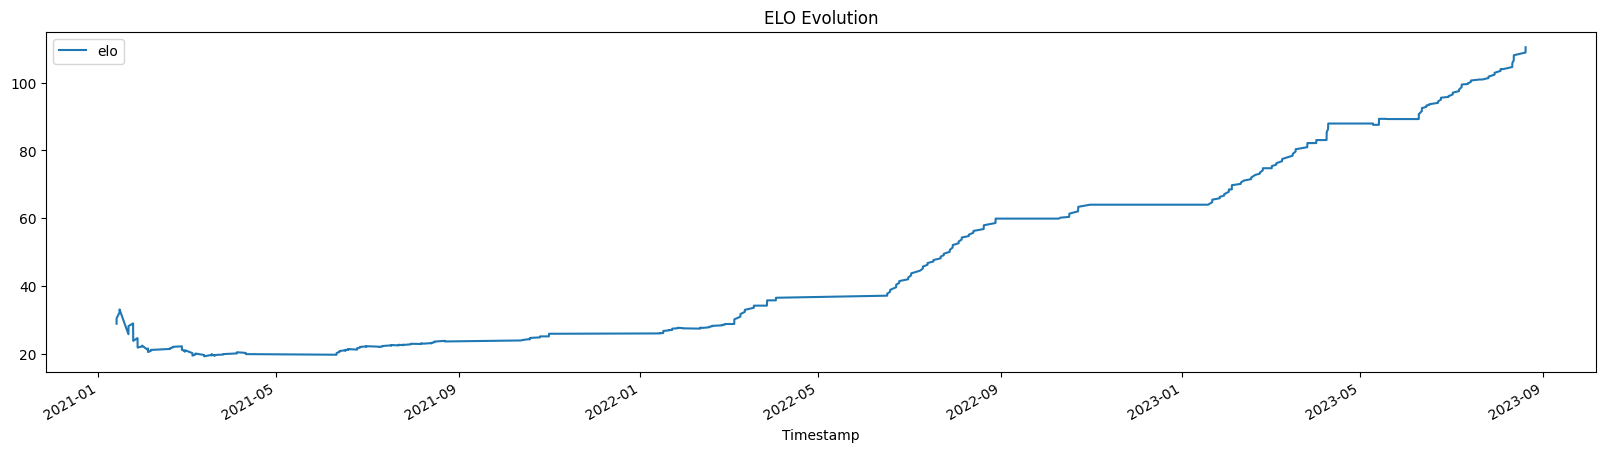

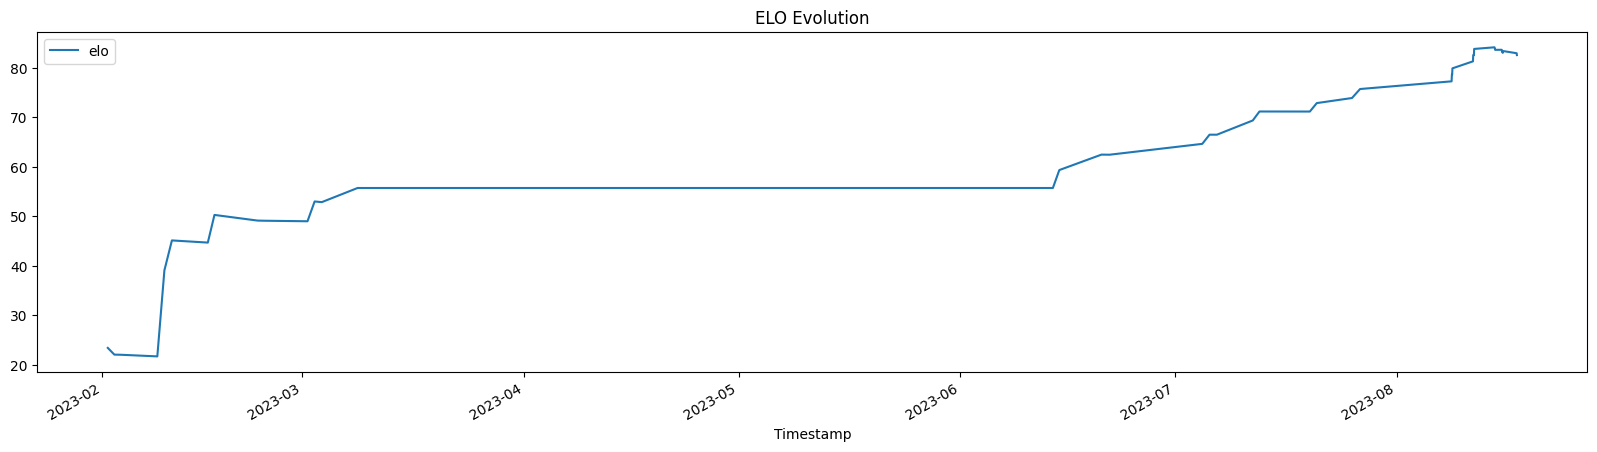

In [41]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt

def getFile(path):
    fd = os.open(path, os.O_RDONLY)
    data = os.read(fd, os.path.getsize(path))
    data = json.loads(data)
    os.close(fd)
    return data

elos = getFile("../data/elo/elo.json")
# T1, Beijing Intel, GenG, anubis (EU)
interesting = ["98767991853197861", "99566404850008779", "100205573495116443", "109696073114910519"]
# interesting = ["98767991853197861", "100205573495116443"]

for team in interesting:
    eloData = elos[team]

    eloData.sort(key=lambda x: x["timestamp"])
    dates = pd.to_datetime([d['timestamp'] for d in eloData], format='ISO8601')

    eloGraph = pd.DataFrame({
        'elo': [d['elo'] for d in eloData],
    }, index=dates)
    # reds = [None] * offset + winrate(sorted, "red", offset)[offset:]
    # blues = [None] * offset + winrate(sorted, "blue", offset)[offset:]

    # winrates = pd.DataFrame({
    #     'blue': blues,
    #     'red': reds,
    # }, index=dates)

    eloGraph.plot(title="ELO Evolution", xlabel="Timestamp", figsize=(20, 5))

Mean Squared Error: 50.75
R Squared: 0.83
R: 0.91


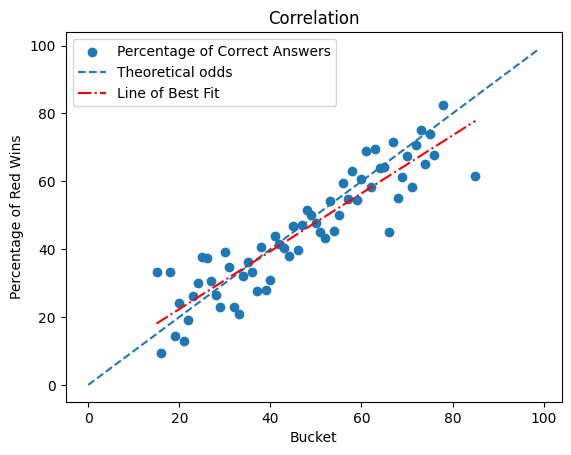

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import math

predictions = getFile("../data/elo/predictions.json")

predictions = getFile("../data/elo/predictions.json")

# Calculate percentages
percentages = []
for i in predictions:
    if i is None or i['total'] < 20:
        percentages.append(None)
    else:
        percentage = (i['correct'] / i['total']) * 100
        percentages.append(percentage)

# Remove None values for line of best fit calculation
filtered_x_values = [x for x, y in enumerate(percentages) if y is not None]
filtered_percentages = [y for y in percentages if y is not None]

# Calculate the line of best fit
m, b = np.polyfit(filtered_x_values, filtered_percentages, 1)
best_fit_y = [m*x + b for x in filtered_x_values]

# Calculate MSE
mse = np.mean((np.array(filtered_percentages) - np.array(best_fit_y)) ** 2)

# Create x values
x_values = list(range(len(predictions)))

# Plot the data
fig, ax = plt.subplots()
ax.scatter(x_values, percentages, label='Percentage of Correct Answers')

# Plot y=x line
ax.plot(x_values, x_values, label='Theoretical odds', linestyle='--')

# Plot the line of best fit
ax.plot(filtered_x_values, best_fit_y, label='Line of Best Fit', color='red', linestyle='-.')

# Add labels, title, and legend
ax.set_xlabel('Bucket')
ax.set_ylabel('Percentage of Red Wins')
ax.set_title(f"Correlation")

print(f"Mean Squared Error: {mse:.2f}")
variance = np.var(filtered_percentages)

r_squared = 1 - (mse / variance)
r = np.sqrt(r_squared)
print(f"R Squared: {r_squared:.2f}")
print(f"R: {r:.2f}")
ax.legend()

# Show the plot
plt.show()